<!-- <center>
<h2>
MALLORN Astronomical Classification
</h2>
</center>

<center>
<h2></h2>
<h3></h3>
<h3></h3>
<h3>
Rasmus Eliasson & Oskar Flodin
</h3>
<img src="bth.png" width="100">

<h5>
    M.Sc. Eng. in AI & Machine Learning <br>
    DIDA, Blekinge Institute of Technology<br>
    Karlskrona, Sweden
</h5>

<mail>rael23@student.bth.se <br>
osfl22@student.bth.se</mail>

<p>2025-12-12</p>
</center>
 -->

 <h2 style="text-align:center;">MALLORN Astronomical Classification</h2>

<h3 style="text-align:center;">Rasmus Eliasson & Oskar Flodin</h3>

<div style="text-align:center;">
    <img src="bth.png" width="100">
    <h5 style="margin:4px 0; line-height:1.2;">
        M.Sc. Eng. in AI & Machine Learning<br>
        DIDA, Blekinge Institute of Technology
    </h5>
    <h5 style="margin:4px 0;">Karlskrona, Sweden</h5>
    <a href="mailto:rael23@student.bth.se">rael23@student.bth.se</a><br>
    <a href="mailto:osfl22@student.bth.se">osfl22@student.bth.se</a>
    <p style="text-align:center;">
</div>



<center>
<h2>
    Traditional Machine Learning Approach - Pre processing
</h2>
</center>


In [1]:
import os
import pandas as pd
import numpy as np
import extract_data as ed
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets

main_folder = "mallorn-astronomical-classification-challenge"
data_folder = "Data"
data_path = os.path.join(os.getcwd(), data_folder)
re_extract_data = False

path = os.path.join(os.getcwd(), main_folder)


# data_paths_list = [os.path.join(main_folder, d) for d in os.listdir(main_folder) if os.path.isdir(os.path.join(main_folder, d))]


base_path = os.path.join(os.getcwd(), "mallorn-astronomical-classification-challenge")

split_paths = [
    os.path.join(base_path, d)
    for d in os.listdir(base_path)
    if d.startswith("split_") and os.path.isdir(os.path.join(base_path, d))
]

split_map = {
    os.path.basename(p): p
    for p in split_paths
}



In [2]:



def Null_check_func(split_name):
    split_path = split_map[split_name]

    split_train = pd.read_csv(
        os.path.join(split_path, "train_full_lightcurves.csv")
    )
    split_test = pd.read_csv(
        os.path.join(split_path, "test_full_lightcurves.csv")
    )

    fig, axes = plt.subplots(1, 2, figsize=(14, 8))

    sns.heatmap(
        split_train.isnull(),
        cbar=False,
        yticklabels=False,
        cmap="viridis",
        ax=axes[0]
    )
    axes[0].set_title(f"Check for train NULLs in {split_name}")

    sns.heatmap(
        split_test.isnull(),
        cbar=False,
        yticklabels=False,
        cmap="viridis",
        ax=axes[1]
    )
    axes[1].set_title(f"Check for test NULLs in {split_name}")

    plt.show();


widgets.interact(
    Null_check_func,
    split_name=widgets.Dropdown(options=sorted(split_map.keys()))
);


interactive(children=(Dropdown(description='split_name', options=('split_01', 'split_02', 'split_03', 'split_0…

In [3]:

if re_extract_data:
    df_train, df_test = ed.merge_and_save_data()
else:
    df_train = pd.read_csv(os.path.join(data_path, "MALLORN-data_train.csv"), sep=',')
    df_test = pd.read_csv(os.path.join(data_path, "MALLORN-data_test.csv"), sep=',')

# df_train

In [4]:
exclude_cols = [
    "English Translation",
    "object_id",
    "split",
    "SpecType",
    "target"
]
common_cols = sorted(
    set(df_train.columns).intersection(df_test.columns) - set(exclude_cols)
)

df_train = df_train.dropna(axis=1, how="all")
df_test  = df_test.dropna(axis=1, how="all")

def attribute_func(Attribute):
    fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharey=True)

    if Attribute in df_train.columns:
        sns.boxplot(data=df_train[[Attribute]], ax=axes[0], color="darkred")
    axes[0].set_title(f"Dataset Train: {Attribute}")
    axes[0].set_xlabel("")

    if (Attribute in df_test.columns and Attribute not in exclude_cols):
        sns.boxplot(data=df_test[[Attribute]], ax=axes[1], color="darkred")
    axes[1].set_title(f"Dataset Test: {Attribute}")
    axes[1].set_xlabel("")

    plt.tight_layout()
    plt.show()

widgets.interact(attribute_func, Attribute=common_cols);

interactive(children=(Dropdown(description='Attribute', options=('EBV', 'Z', 'Z_err', 'flux_peak_g', 'flux_pea…

In [5]:
# all_cols[-1]

In [6]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import Dropdown, VBox, interactive_output

# --------------------------------------------------
# Assumes df_train and df_test already exist
# --------------------------------------------------

df_map = {
    "train": df_train,
    "test": df_test
}

# --------------------------------------------------
# Helper: create column intervals
# --------------------------------------------------
def make_intervals(df, group_size=6):
    intervals = []
    n_cols = len(df.columns)

    for i in range(0, n_cols, group_size):
        start = i + 1
        end = min(i + group_size, n_cols)
        intervals.append(f"{start}-{end}")

    return intervals


def get_intervals(dataset):
    return make_intervals(df_map[dataset], group_size=6)

# --------------------------------------------------
# Plot function (controlled by widgets)
# --------------------------------------------------
def histo_plot(dataset, interval):
    df = df_map[dataset]

    start, end = map(int, interval.split("-"))
    cols = df.columns[start - 1:end]

    df[cols].hist(bins="auto", figsize=(12, 8))
    plt.suptitle(
        f"{dataset.upper()} histograms — columns {interval}",
        fontsize=18
    )
    plt.tight_layout()
    plt.show()

# --------------------------------------------------
# Widgets
# --------------------------------------------------
dataset_widget = Dropdown(
    options=["train", "test"],
    value="train",
    description="Dataset:"
)

interval_widget = Dropdown(
    description="Interval:"
)

# Update interval options when dataset changes
def update_intervals(change):
    interval_widget.options = get_intervals(change["new"])
    interval_widget.value = interval_widget.options[0]

dataset_widget.observe(update_intervals, names="value")
update_intervals({"new": dataset_widget.value})  # initialize

# --------------------------------------------------
# Layout & display
# --------------------------------------------------
ui = VBox([dataset_widget, interval_widget])

out = interactive_output(
    histo_plot,
    {
        "dataset": dataset_widget,
        "interval": interval_widget
    }
)

display(ui, out)


Output()

In [7]:
# print(df_train.columns.tolist())
# # df_test

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets

# --------------------------------------------------
# Assumes df_train already exists and includes `target`
# --------------------------------------------------

features = df_train.copy()

# --------------------------------------------------
# 1. Create amplitude features (per filter)
# --------------------------------------------------
bands = ["u", "g", "r", "i", "z", "y"]

for band in bands:
    max_col = f"max_flux_{band}"
    min_col = f"min_flux_{band}"
    if max_col in features.columns and min_col in features.columns:
        features[f"amplitude_{band}"] = features[max_col] - features[min_col]

# --------------------------------------------------
# 2. Get numeric feature list (exclude target)
# --------------------------------------------------
numeric_features = (
    features
    .select_dtypes(include="number")
    .columns
    .drop("target", errors="ignore")
)

# --------------------------------------------------
# 3. Plot function (distribution + reference scatter)
# --------------------------------------------------
def feature_distribution_vs_class(feature, reference):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    display_name = feature.replace("_", " ").title()
    reference_name = reference.replace("_", " ").title()

    # ---- Left: distribution by class ----
    sns.histplot(
        data=features,
        x=feature,
        hue="target",
        bins="auto",
        element="step",
        kde=False,
        ax=axes[0]
    )

    axes[0].set_title(f"Distribution of {display_name} by Class")
    axes[0].set_xlabel(display_name)
    axes[0].set_ylabel("Count")

    # ---- Right: feature vs reference ----
    sns.scatterplot(
        data=features,
        x=feature,
        y=reference,
        hue="target",
        alpha=0.6,
        ax=axes[1]
    )

    axes[1].set_title(f"{display_name} vs {reference_name}")
    axes[1].set_xlabel(display_name)
    axes[1].set_ylabel(reference_name)

    fig.tight_layout()
    plt.show()

# --------------------------------------------------
# 4. Interactive widgets
# --------------------------------------------------
widgets.interact(
    feature_distribution_vs_class,
    feature=widgets.Dropdown(
        options=numeric_features,
        description="Feature:"
    ),
    reference=widgets.Dropdown(
        options=numeric_features,
        description="Reference:"
    )
);


interactive(children=(Dropdown(description='Feature:', options=('n_obs_u', 'mean_flux_u', 'std_flux_u', 'max_f…

In [9]:
# Only numeric columns
df_num = df_train.select_dtypes(include=[np.number]).copy()

# Checks if target is boolean in teh dataframe, make it numeric
if "target" in df_train.columns and "target" not in df_num.columns:
    df_num["target"] = pd.to_numeric(df_train["target"], errors="coerce")
# Correlation on numeric values
corr_matrix = df_num.corr(numeric_only=True)
attributes = corr_matrix.columns.tolist()

def correlation_graph(attribute = 'target'):
    corr_with_attribute = corr_matrix[attribute].sort_values(ascending=False)

    # Exclude the 'attribute' itself.
    features = corr_with_attribute.index[corr_with_attribute.index != attribute]

    plot_df = pd.DataFrame({
        "feature": features,
        "correlation": corr_with_attribute[features].values
    })

    # Makes some nice scale for the plot.
    min_corr = round(plot_df['correlation'].min(), 1)
    max_corr = round(plot_df['correlation'].max(), 1)
    margin = 0.05

    plt.figure(figsize=(12,6))
    sns.barplot(x="feature", y="correlation", data=plot_df, hue="correlation", dodge=False, palette="coolwarm")
    plt.xticks(rotation=90)
    plt.ylim(min_corr - margin, max_corr + margin)
    plt.title(f"Correlation of features with {attribute}")
    plt.ylabel(f"Correlation with {attribute}")
    # remove legend, since it does not contribute.
    plt.legend([],[], frameon=False)
    plt.show()

widgets.interact(correlation_graph, attribute = attributes);

interactive(children=(Dropdown(description='attribute', index=62, options=('n_obs_u', 'mean_flux_u', 'std_flux…

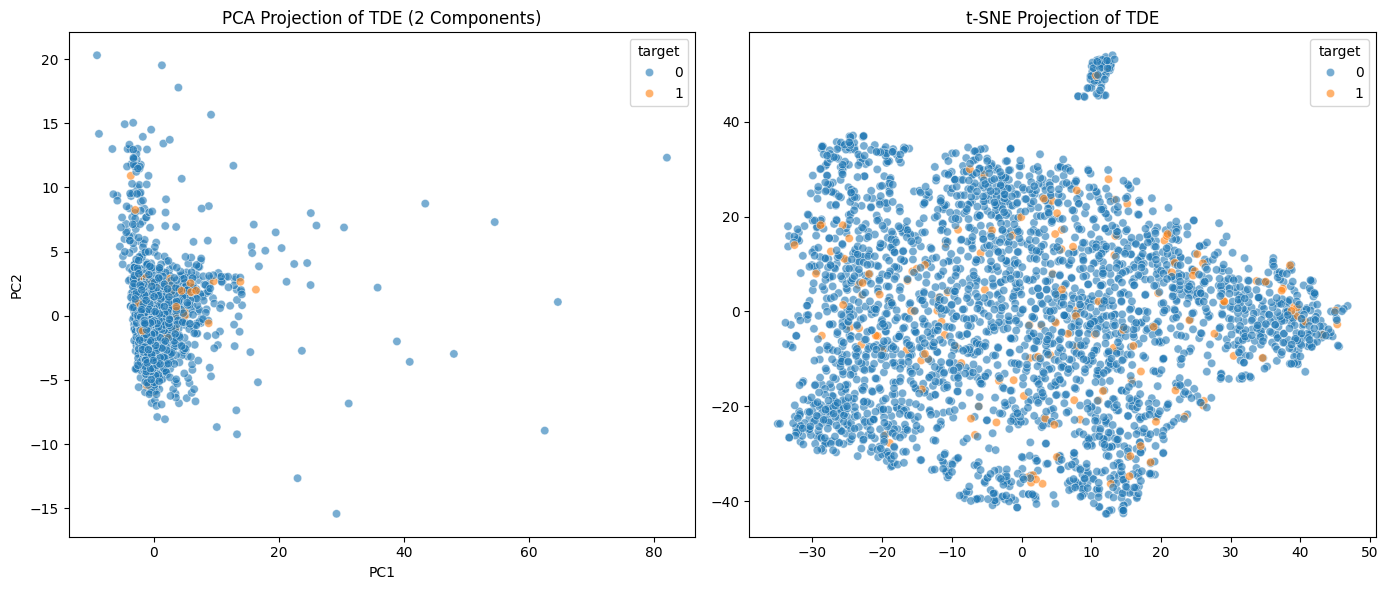

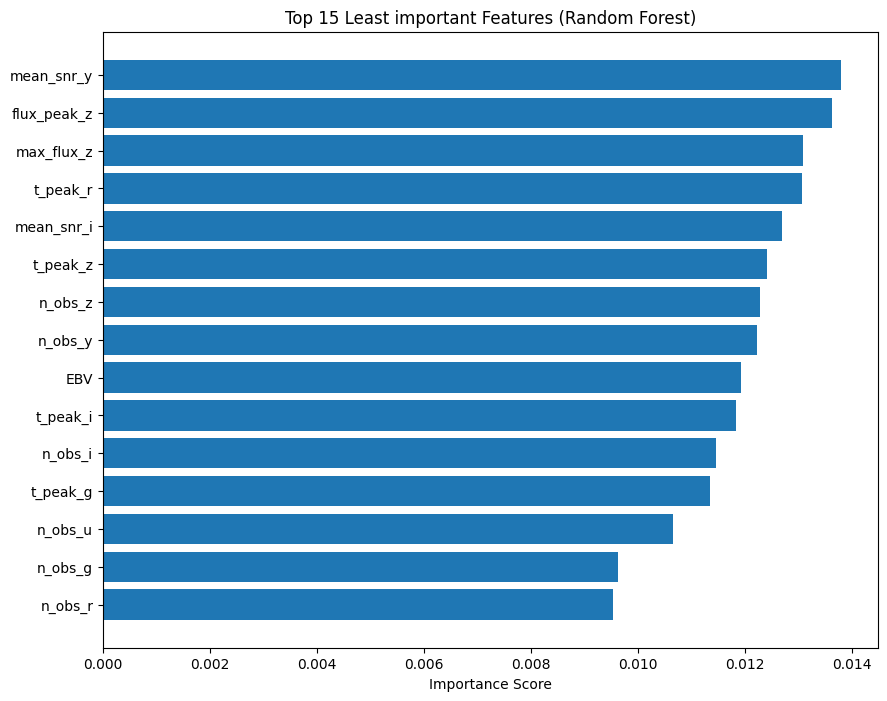

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier


#####################################
#               PCA                 #
#####################################
fig, subfigs = plt.subplots(1, 2, figsize=(14, 6))

df_num.dropna(inplace=True)

X = df_num.drop(columns=exclude_cols, errors="ignore")


# 3. Keep only numeric columns (VERY important for PCA / t-SNE)
X = X.select_dtypes(include="number")
y = df_num['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# PCA computes orthogonal linear combinations of the original features.
# PC1 captures the maximum variance direction; PC2 captures the next,
# orthogonal direction. Class labels are not used.
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

sns.scatterplot(x=components[:,0], y=components[:,1], hue=y, alpha=0.6, ax=subfigs[0])
subfigs[0].set_title("PCA Projection of TDE (2 Components)")
subfigs[0].set_xlabel("PC1")
subfigs[0].set_ylabel("PC2")


#####################################
#              t_SNE                #
#####################################
# t-SNE is a non-linear, unsupervised embedding that preserves local
# neighborhood relationships. It is primarily used for visualization
# and does not preserve global distances or class boundaries.
tsne = TSNE(n_components=2, random_state=42, perplexity=40)
tsne_results = tsne.fit_transform(X_scaled)

sns.scatterplot(x=tsne_results[:,0], y=tsne_results[:,1], hue=y, alpha=0.6, ax=subfigs[1])
subfigs[1].set_title("t-SNE Projection of TDE")
fig.tight_layout()
plt.show()


#####################################
#       Feature importance          #
#####################################
drop_cols = [
    "English Translation",
    "object_id",
    "split",
    "target"
]

X = df_num.drop(columns=drop_cols, errors="ignore")
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X, y)

# importances = rf.feature_importances_
# indices = np.argsort(importances)[::-1]

# plt.figure(figsize=(10,8))
# plt.title("Top 15 Most Important Features (Random Forest)")
# plt.barh([X.columns[i] for i in indices[:15]], importances[indices[:15]])
# plt.gca().invert_yaxis()
# plt.xlabel("Importance Score")
# plt.show()



importances = rf.feature_importances_
indices = np.argsort(importances)  # ascending order

plt.figure(figsize=(10,8))
plt.title("Top 15 Least important Features (Random Forest)")
plt.barh([X.columns[i] for i in indices[:15]], importances[indices[:15]])
plt.xlabel("Importance Score")
plt.show()



<center>
<h2>Dimensionality Reduction Analysis of TDE Feature Space</h2>
</center>

<h3>Overview</h3>
<p>
The figure above presents two low-dimensional projections of the TDE dataset:
a <b>PCA projection (2 components)</b> and a <b>t-SNE projection</b>, with points
colored by the binary target label (TDE vs. non-TDE).
These projections are used to assess the intrinsic structure of the feature
space and the separability of the target classes.
</p>

<h3>PCA Projection</h3>
<p>
The PCA projection shows that the data is highly concentrated along the first
principal component, with substantial variance spread across a wide range of
values. Despite this variance, there is <b>no clear linear separation</b> between
TDE and non-TDE events. The minority TDE class appears sparsely distributed and
largely embedded within the dominant non-TDE population.
</p>

<p>
This suggests that the directions of maximum variance captured by PCA are not
aligned with the decision boundary required to separate the classes, indicating
that a simple linear model operating in the original feature space may struggle
to discriminate between TDE and non-TDE events.
</p>

<h3>t-SNE Projection</h3>
<p>
The t-SNE visualization further highlights the complexity of the data structure.
While local clustering patterns are visible, the TDE events do not form a
distinct or isolated cluster. Instead, they are scattered throughout the
manifold occupied by the majority class.
</p>

<p>
Because t-SNE emphasizes local neighborhood structure, the lack of a cohesive
TDE cluster suggests that TDE events are not characterized by a single, compact
region of feature space, but rather overlap significantly with non-TDE events
across multiple local neighborhoods.
</p>

<h3>Implications for Model Choice</h3>
<p>
The strong overlap observed in both PCA and t-SNE projections implies that
<b>logistic regression is likely to be a poor baseline model</b> for this task.
As a linear classifier, logistic regression assumes a roughly linear decision
boundary, which is inconsistent with the complex, overlapping structure observed
in the projections.
</p>

<p>
More expressive, non-linear models such as <b>tree-based ensembles</b> (e.g.,
Random Forests, Gradient Boosting) or <b>kernel-based methods</b> are better suited
to capture the interactions and higher-order decision boundaries implied by the
data.
</p>

<h3>Class Imbalance Considerations</h3>
<p>
Another critical factor is the apparent <b>class imbalance</b>. TDE events
represent a small fraction of the dataset, which further degrades the performance
of linear classifiers trained with standard loss functions.
</p>

<p>
To mitigate this, rebalancing strategies should be explored, including:
</p>
<ul>
  <li>Oversampling techniques such as <b>SMOTE</b> or its variants</li>
  <li>Class-weighted loss functions</li>
  <li>Anomaly-detection or rare-event classification frameworks</li>
</ul>

<p>
However, even with oversampling, the heavy overlap in feature space suggests that
performance gains from linear models may remain limited.
</p>

<h3>Conclusion</h3>
<p>
Overall, the dimensionality reduction analysis indicates that TDE classification
is a <b>non-linearly separable, imbalanced learning problem</b>. Logistic
regression is therefore unlikely to provide strong performance without extensive
feature engineering. The results motivate the use of non-linear models combined
with imbalance-aware training strategies to better capture the underlying
structure of the data.
</p>


In [11]:
from StackingEnsemble import StackingEnsemble
from custom_wrapped_NN import create_nn_classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
# !pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
X_train, x_test, y_train, y_test = train_test_split(X, y, stratify = y)



# LogisticRegression(penalty="l1", solver="saga")
# KNeighborsClassifier(n_neighbors=15, weights="distance")


# qda.fit(X_train, y_train
random_state = 42

n_negative = (y_train == 0).sum()
n_positive = (y_train == 1).sum()
scale_pos_weight = n_negative / n_positive


base_models = {
    "nn": Pipeline([
        ("scaler", StandardScaler()),
        ("nn", create_nn_classifier(
            input_dim=X_train.shape[1],
            numb_classifiers=2,
            random_state = random_state
        ))
    ]),

    "nb": GaussianNB(),
    
    # "gdb": GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=6),
    "xgb": XGBClassifier(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=6,

        # very important defaults
        subsample=0.8,
        colsample_bytree=0.8,

        objective="binary:logistic",   # or "multi:softprob"
        eval_metric="logloss",
        n_jobs = -1,
        random_state = random_state
        # scale_pos_weight=scale_pos_weight
    ),

    "svm_sigmoid": Pipeline([
        ("scaler", StandardScaler()),
        ("svm", SVC(kernel="sigmoid", probability=True, random_state = random_state))
    ]),

    "svm_poly": Pipeline([
        ("scaler", StandardScaler()),
        ("svm", SVC(kernel="poly", probability=True, random_state= random_state))
    ]),


    # Maybe exclude theese.
    "qda": Pipeline([
        ("scaler", StandardScaler()),
        ("qda", QuadraticDiscriminantAnalysis(reg_param=0.1))
    ]),

    # # optional: add LDA instead of base logistic regression
    # "lda": Pipeline([
    #     ("scaler", StandardScaler()),
    #     ("lda", LinearDiscriminantAnalysis())
    # ]),

    # optional: base logistic regression (can be redundant with LR meta-model)
    "logreg_base": Pipeline([
        ("scaler", StandardScaler()),
        ("lr", LogisticRegression(max_iter=2000))
    ]),
}

# base_models = {
#     "gbdt": XGBClassifier(...),
#     "svm": SVC(probability=True, ...),
#     "nn": MLPClassifier(...),
# }

# base_models["xgb"]

from sklearn.tree import DecisionTreeClassifier

meta_tree = DecisionTreeClassifier(
    max_depth=2,              # shallow on purpose
    min_samples_leaf=20,      # prevents tiny-leaf overfit
    class_weight="balanced",  # helps with rare TDEs
    random_state=42
)

# stacked_model = StackingEnsemble(base_models, meta_model=LogisticRegression(max_iter=1000, class_weight='balanced'), n_folds=5)
stacked_model = StackingEnsemble(base_models, meta_model=meta_tree, n_folds=5)




In [12]:
# X_train.describe()

# y_train.describe()

# len(y_train)
# y_train

# base_models["nb"]

In [13]:

if not stacked_model.check_trained:
    stacked_model.fit(X_train, y_train)
else:
    stacked_model: StackingEnsemble = StackingEnsemble.load_or_create()
    

Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Final model trained: nn
Final model trained: nb
Final model trained: xgb
Final model trained: svm_sigmoid
Final model trained: svm_poly
Final model trained: qda
Final model trained: logreg_base
Model saved to meta_data\saved_model


In [14]:
# base_models.items()
y_pred = stacked_model.predict(x_test)
y_pred
# stacked_model.

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

[[522 194]
 [  8  29]]
              precision    recall  f1-score   support

           0     0.9849    0.7291    0.8379       716
           1     0.1300    0.7838    0.2231        37

    accuracy                         0.7317       753
   macro avg     0.5575    0.7564    0.5305       753
weighted avg     0.9429    0.7317    0.8077       753



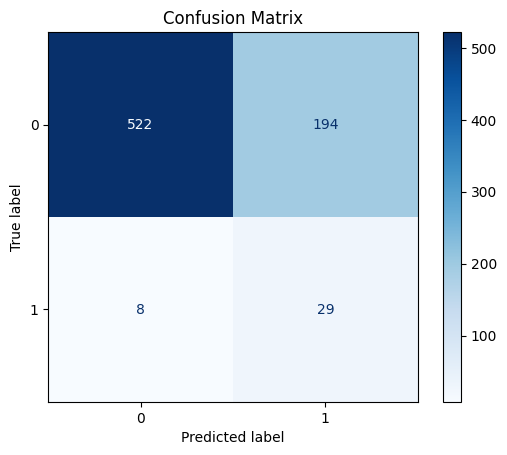

In [15]:
# y_pred.sum()


from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix
# from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
# test.unique()

print(cm)
print(classification_report(y_test, y_pred, digits=4))

# Create display with labels from the unique classes
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=sorted(y_test.unique()))


disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix")
plt.show()


Loading model from meta_data\saved_model
[[522 194]
 [  8  29]]
              precision    recall  f1-score   support

           0     0.9849    0.7291    0.8379       716
           1     0.1300    0.7838    0.2231        37

    accuracy                         0.7317       753
   macro avg     0.5575    0.7564    0.5305       753
weighted avg     0.9429    0.7317    0.8077       753



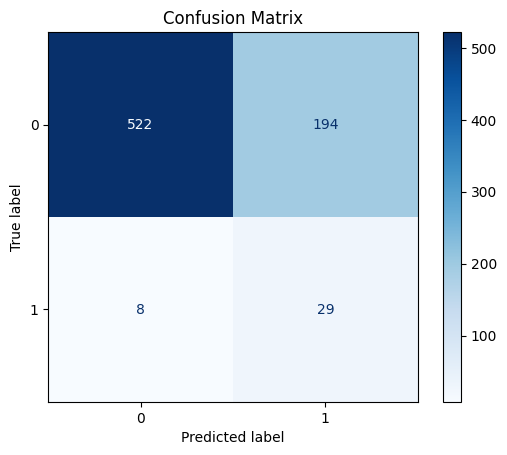

In [16]:
# y_pred.sum()

Stackingmodel2: StackingEnsemble = StackingEnsemble.load_or_create()

y_pred = Stackingmodel2.predict(x_test)



# from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
# test.unique()

print(cm)
print(classification_report(y_test, y_pred, digits=4))

# Create display with labels from the unique classes
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=sorted(y_test.unique()))


disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix")
plt.show()


In [17]:
from sklearn.metrics import f1_score, make_scorer, accuracy_score

f1 = f1_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred, average="weighted")
print(f1)

0.2230769230769231


In [18]:
import numpy as np
from sklearn.metrics import f1_score

p_val = stacked_model.predict_proba(x_test)[:, 1]

thresholds = np.linspace(0.01, 0.6, 200)
f1s = []

for t in thresholds:
    y_hat = (p_val >= t).astype(int)
    f1s.append(f1_score(y_test, y_hat, pos_label=1))

best_t = thresholds[np.argmax(f1s)]
best_f1 = max(f1s)

print("Best threshold:", best_t)
print("Best validation F1:", best_f1)

p_test = stacked_model.predict_proba(x_test)[:, 1]
y_test_pred = (p_test >= best_t).astype(int)



Best threshold: 0.5495979899497487
Best validation F1: 0.26


In [19]:
from sklearn.metrics import f1_score
import numpy as np

p = stacked_model.predict_proba(x_test)[:, 1]

thresholds = np.linspace(0.01, 0.5, 100)
f1s = [f1_score(y_test, (p >= t).astype(int)) for t in thresholds]

best_t = thresholds[np.argmax(f1s)]
best_f1 = max(f1s)

print("Best threshold:", best_t)
print("Best F1:", best_f1)


Best threshold: 0.38616161616161615
Best F1: 0.2230769230769231


In [20]:
import numpy as np
import pandas as pd

test = pd.DataFrame({
    "y_pred": y_pred
})

unique, counts = np.unique(y_pred, return_counts=True)

class_dist = pd.DataFrame({
    "Quality": unique,
    "Count": counts
})

print("Class distribution in y_pred:")
print(class_dist)


Class distribution in y_pred:
   Quality  Count
0        0    530
1        1    223


In [21]:
y_prob = stacked_model.predict_proba(X_train)[:, 1]

print(
    np.min(y_prob),
    np.percentile(y_prob, [50, 75, 90, 95, 99]),
    np.max(y_prob)
)


0.02229329124570398 [0.38143534 0.38143534 0.80054244 0.80054244 0.80054244] 0.8005424428315264


In [22]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC: {roc_auc:.4f}")


from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve (AUC = {roc_auc:.3f})")
plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [753, 2257]

In [ ]:
pred_dist = (
    pd.Series(y_pred)
    .value_counts()
    .sort_index()
    .rename("Count_pred")
)


true_dist = (
    y
    .value_counts()
    .sort_index()
    .rename("Count_true")
)

print("Class distribution in y_pred:")
print(pred_dist, "\n")

print("Class distribution in y_train:")
print(true_dist)


Class distribution in y_pred:
0    752
1      1
Name: Count_pred, dtype: int64 

Class distribution in y_train:
target
0    2863
1     147
Name: Count_true, dtype: int64


In [ ]:
pred_dist = (
    pd.Series(y_pred)
    .value_counts()
    .sort_index()
    .rename("Count_pred")
)

true_dist = (
    y
    .value_counts()
    .sort_index()
    .rename("Count_true")
)

print("Class distribution in y_pred:")
print(pred_dist, "\n")

print("Class distribution in y_train:")
print(true_dist)

# y.describe()




Class distribution in y_pred:
0    752
1      1
Name: Count_pred, dtype: int64 

Class distribution in y_train:
target
0    2863
1     147
Name: Count_true, dtype: int64


True

In [ ]:
#Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# !pip install extinction==0.4.7




main_folder = "mallorn-astronomical-classification-challenge"
data_folder = "Data"
path = os.path.join(os.getcwd(), main_folder)
# Path to your main folder

# Get all unique directories
Data_dict = [os.path.join(main_folder, d) for d in os.listdir(main_folder) if os.path.isdir(os.path.join(main_folder, d))]

# print("Unique directories found:")
# for d in Data_dict:
#     print(d)

path = os.path.join(os.getcwd(), main_folder)
path2 = os.path.join(path, 'split_01')
# print(path)
df_split1 = pd.read_csv(os.path.join(path2, "train_full_lightcurves.csv"), sep = ',')

df = df_split1.copy()

#Setting filter colours for later plotting
filter_colours = {'u': '#6A5ACD', 'g': '#2ca02c', 'r': '#d62728', 'i': '#ff7f0e', 'z': '#8c564b', 'y': '#1b1b1b'}


#Define name of chosen object
# object_ID = 'amon_imloth_luin'
object_ID = 'Dornhoth_fervain_onodrim'

#Creating masks to isolate data for chosen lightcurve and split according to filter
u_mask = ((df['Filter'] == 'u') & (df['object_id'] == object_ID))
g_mask = ((df['Filter'] == 'g') & (df['object_id'] == object_ID))
r_mask = ((df['Filter'] == 'r') & (df['object_id'] == object_ID))
i_mask = ((df['Filter'] == 'i') & (df['object_id'] == object_ID))
z_mask = ((df['Filter'] == 'z') & (df['object_id'] == object_ID))
y_mask = ((df['Filter'] == 'y') & (df['object_id'] == object_ID))

#Saving fluxes, times and error values for the object split according to filter
u_flux = np.array(df.loc[u_mask, 'Flux']); u_time = np.array(df.loc[u_mask, 'Time (MJD)']); u_err = np.array(df.loc[u_mask, 'Flux_err'])
g_flux = np.array(df.loc[g_mask, 'Flux']); g_time = np.array(df.loc[g_mask, 'Time (MJD)']); g_err = np.array(df.loc[g_mask, 'Flux_err'])
r_flux = np.array(df.loc[r_mask, 'Flux']); r_time = np.array(df.loc[r_mask, 'Time (MJD)']); r_err = np.array(df.loc[r_mask, 'Flux_err'])
i_flux = np.array(df.loc[i_mask, 'Flux']); i_time = np.array(df.loc[i_mask, 'Time (MJD)']); i_err = np.array(df.loc[i_mask, 'Flux_err'])
z_flux = np.array(df.loc[z_mask, 'Flux']); z_time = np.array(df.loc[z_mask, 'Time (MJD)']); z_err = np.array(df.loc[z_mask, 'Flux_err'])
y_flux = np.array(df.loc[y_mask, 'Flux']); y_time = np.array(df.loc[y_mask, 'Time (MJD)']); y_err = np.array(df.loc[y_mask, 'Flux_err'])

                  object_id      Z  Z_err   EBV SpecType  \
0  Dornhoth_fervain_onodrim  3.049    NaN  0.11      AGN   

                               English Translation     split  target  
0  Trawn Folk (Dwarfs) + northern + Ents (people)   split_01       0  
u band extinction = [0.52232173]
g band extinction = [0.41492566]
r band extinction = [0.28512226]
i band extinction = [0.209827]
z band extinction = [0.16377872]
y band extinction = [0.12726912]


C:\Users\rasmu\AppData\Local\Temp\ipykernel_11308\42776058.py:38: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  A_lambda = fitzpatrick99(eff_wl, ebv * 3.1) #3.1 = Standard Milky Way value


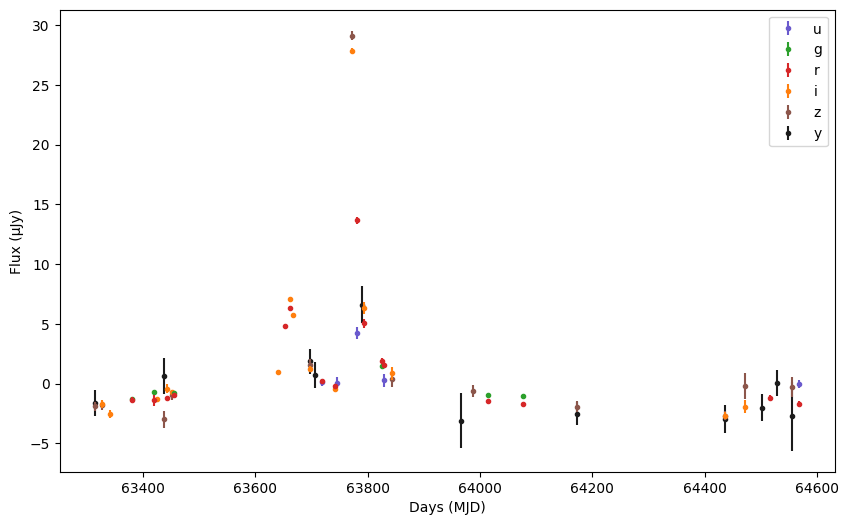

In [ ]:
#Loading in log data file
# log_path = '/content/rubin_sim_data/train_log_tutorial.csv'
log_path = 'train_log.csv'

log_df = pd.read_csv(os.path.join(path, log_path))

#Selecting only the data relevant to the chosen object
object_log = log_df.loc[log_df['object_id'] == object_ID]
print(object_log)

#Defining the redshift of that object
redshift = object_log['Z']

#redshift_err = object_log['Z_err']
#For training set, it is a spectroscopically determined redshift (with negligible error).
#For testing set, it will be a photometrically determined redahift and will have an error value that can be loaded in using the above line.

ebv = object_log['EBV']
#Loading in the extinction coefficient value
#Dust in the Milky Way can obscure the light from a distant object. The amount of extinction is dependent on the position of the object relative to us and the wavelength of light.
#The extinction coefficient (EBV) value is given in the log data to simplify the de-extinction process.

SpecType = object_log['SpecType']
#For the training set, the type of the object will be listed in the 'SpecType' column
#For the testing set, this value will not be present


########################################################
########################################################
########################################################


#Importing necessary package
from extinction import fitzpatrick99

#Defining function to de-extinct a set of flux values
def jurassic_park (flux, eff_wl):
    A_lambda = fitzpatrick99(eff_wl, ebv * 3.1) #3.1 = Standard Milky Way value
    flux_ext = flux * 10**((A_lambda)/2.5)
    return flux_ext, A_lambda


########################################################
########################################################
########################################################

#Effective wavelength for each band - sourced from SVO Filter Profile Service
u_eff_wl = np.array([3641]); g_eff_wl = np.array([4704]); r_eff_wl = np.array([6155])
i_eff_wl = np.array([7504]); z_eff_wl = np.array([8695]); y_eff_wl = np.array([10056])

#De-extincting lightcurves
u_flux, u_A_lambda = jurassic_park(u_flux,u_eff_wl); g_flux, g_A_lambda = jurassic_park(g_flux,g_eff_wl)
r_flux, r_A_lambda = jurassic_park(r_flux,r_eff_wl); i_flux, i_A_lambda = jurassic_park(i_flux,i_eff_wl)
z_flux, z_A_lumbda = jurassic_park(z_flux,z_eff_wl); y_flux, y_A_lambda = jurassic_park(y_flux,y_eff_wl)

print(f'u band extinction = {u_A_lambda}'); print(f'g band extinction = {g_A_lambda}'); print(f'r band extinction = {r_A_lambda}')
print(f'i band extinction = {i_A_lambda}'); print(f'z band extinction = {z_A_lumbda}'); print(f'y band extinction = {y_A_lambda}')

########################################################
########################################################
########################################################

plt.figure(figsize = [10,6])
plt.errorbar(u_time,u_flux, yerr= u_err,label='u', fmt = '.',color = filter_colours['u'],zorder=4)
plt.errorbar(g_time,g_flux,yerr=g_err, label='g', fmt = '.', color = filter_colours['g'],zorder=5)
plt.errorbar(r_time,r_flux,yerr = r_err, label='r', fmt = '.', color = filter_colours['r'],zorder=6)
plt.errorbar(i_time,i_flux,yerr = i_err, label='i', fmt = '.', color = filter_colours['i'],zorder=3)
plt.errorbar(z_time,z_flux,yerr = z_err, label='z', fmt = '.', color = filter_colours['z'],zorder=2)
plt.errorbar(y_time,y_flux,yerr = y_err, label='y', fmt = '.', color = filter_colours['y'],zorder=1)
plt.xlabel('Days (MJD)')
plt.ylabel('Flux (μJy)')
plt.legend()
plt.show()

<Figure size 2000x1000 with 0 Axes>

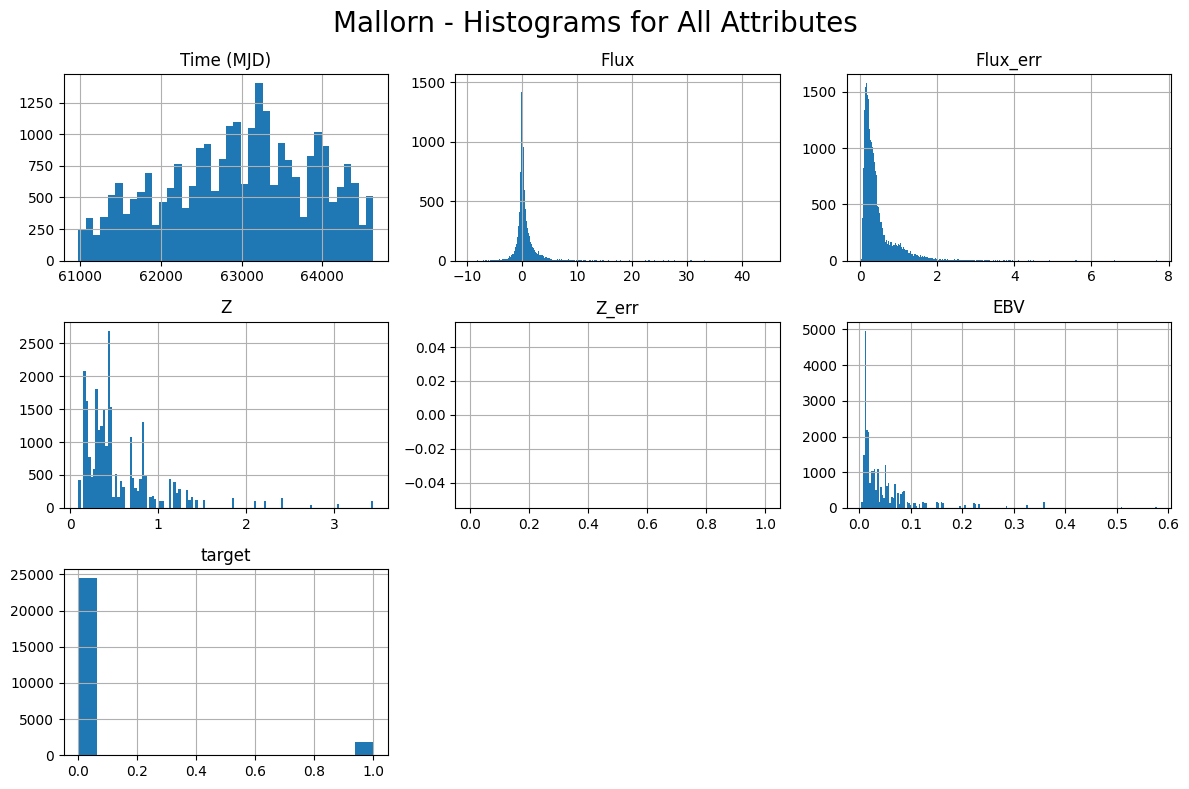

In [ ]:
# data = pd.merge()
data = df.merge(log_df, on="object_id") #, drop = 'English Translation	')

# log_df
# df_split1
# data.head(10)


plt.figure(figsize=(20,10));
data.hist(bins='auto', figsize=(12,8));
plt.suptitle("Mallorn - Histograms for All Attributes", fontsize=20);
plt.tight_layout();
plt.show();


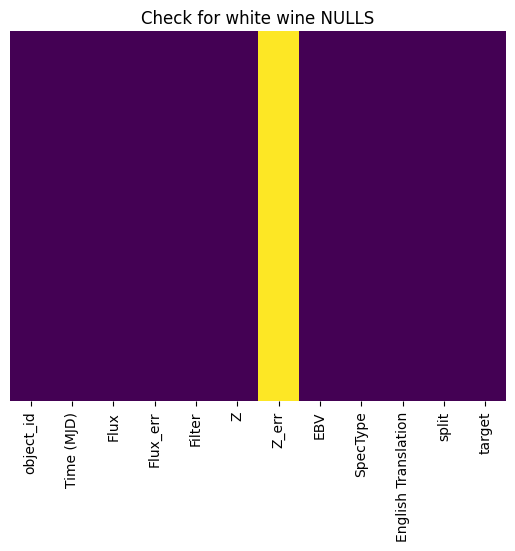

In [ ]:
import seaborn as sns
sns.heatmap(data.isnull(), cbar=False, yticklabels=False, cmap='viridis');
plt.title("Check for white wine NULLS")
plt.show();

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets


# attributes = data[columns]
exclude = ['object_id']
attributes = [c for c in data.columns if c not in exclude]


def attribute_func(Atribute):
    plt.figure(figsize=(10, 4))
    sns.boxplot(
        color="darkred",
        data = data[Atribute]
    )
    plt.title(f"{Atribute}")
    plt.tight_layout()


widgets.interact(attribute_func, Atribute = attributes);

interactive(children=(Dropdown(description='Atribute', options=('Time (MJD)', 'Flux', 'Flux_err', 'Filter', 'Z…

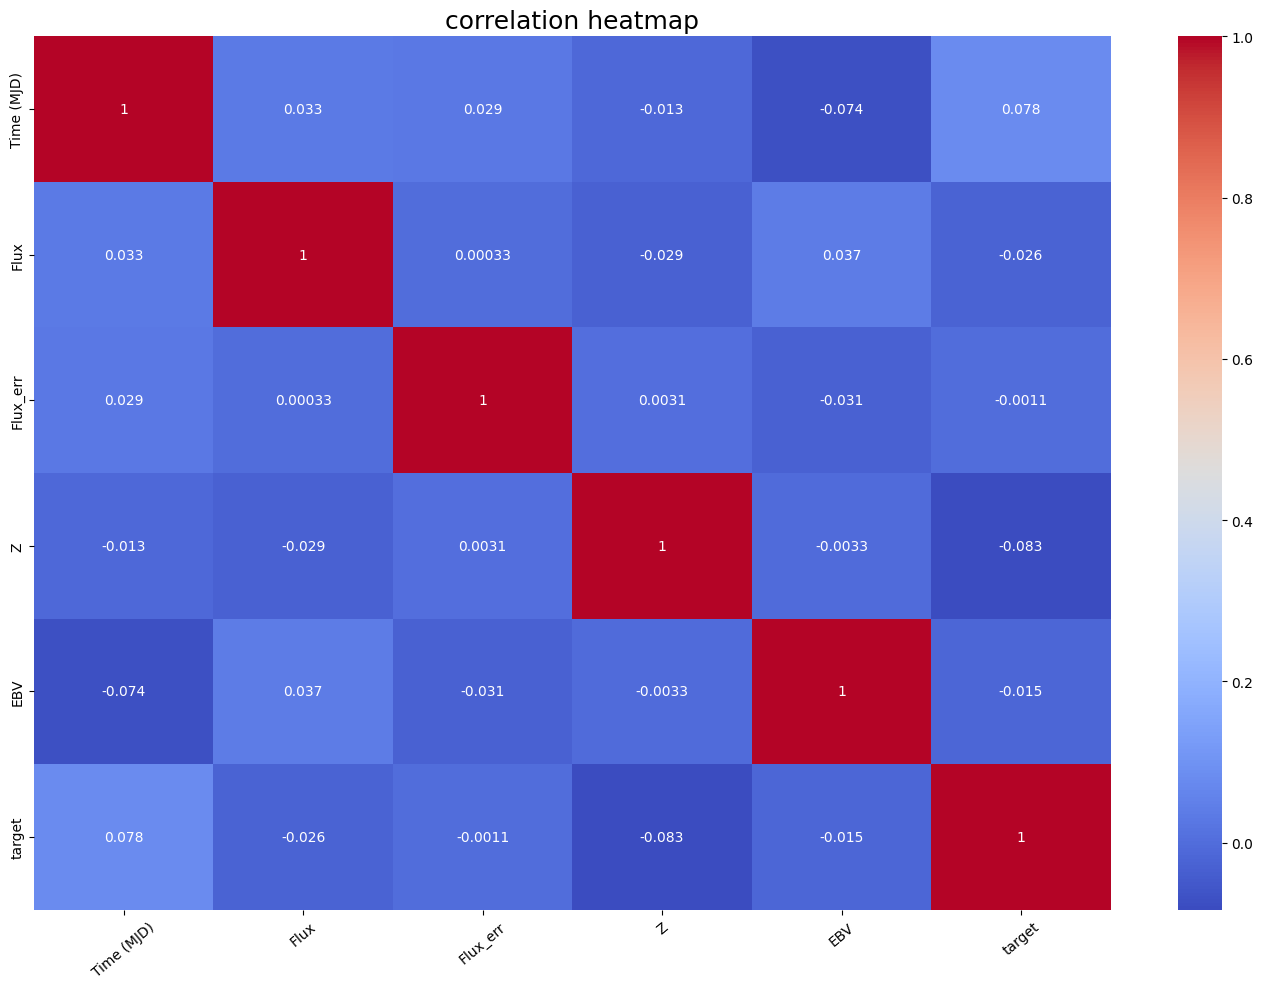

In [ ]:
# Correlation check #

# data.drop(columns=['Z_err', 'English Translation', 'split'])
numeric_data = data.select_dtypes(include=['number'])
numeric_data.drop(inplace=True, columns='Z_err')
plt.figure(figsize=(14,10))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.xticks(rotation=40)
plt.title("correlation heatmap", fontsize=18)
plt.tight_layout()
plt.show()


# plt.figure(figsize=(14,10))
# sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
# plt.xticks(rotation=40)
# plt.title("Red wine correlation heatmap", fontsize = 18)
# plt.tight_layout()
# plt.show()

In [ ]:
data.target.value_counts(normalize=True)

target
0    0.931621
1    0.068379
Name: proportion, dtype: float64

In [ ]:
data.columns

Index(['object_id', 'Time (MJD)', 'Flux', 'Flux_err', 'Filter', 'Z', 'Z_err',
       'EBV', 'SpecType', 'English Translation', 'split', 'target'],
      dtype='object')